# Visualizing Geographical Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives. Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots. Therefore, the data could be visualized on maps.

In this project, we will explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. Flight data is imported from the openflights website (https://openflights.org/data.html#airline). Below is the breakdown of the files we'll be working with and the most pertinent/ columns from each dataset:

airlines.csv - data on each airline
* country - where the airline is headquartered
* active - if the airline is still active

airports.csv - data on each airport
* name - name of the airport
* city - city the airport is located
* country - country the airport is located
* code - unique airport code
* latitude - latitude value
* longitude - longitude value

routes.csv - data on each flight route
* airline - airline for the route
* source - starting city for the route
* dest - destination city for the route

In [1]:
import pandas as pd

# read csv files
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

First row of the datasets:

In [2]:
print("Airlines:")
print(airlines.iloc[0])
print("----------")
print("Airports:")
print(airports.iloc[0])
print("----------")
print("Routes:")
print(routes.iloc[0])

Airlines:
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
----------
Airports:
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
----------
Routes:
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


A CSV file called "geo_routes.csv" contains the latitude and longitude values corresponding to the source and destination airports for each route:

In [8]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


First 5 rows of the geo_routes.csv dataset:

In [9]:
geo_routes.head(5)

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


### Geographic Coordinate System

In [3]:
# to ignore the "The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3." warning
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, we need to convert the coordinates to the Cartesian coordinate system using a map projection.

A map projection transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve. In this project, we will use the Mercator projection, as it is commonly used by popular mapping software.

In [4]:
# Basemap is an extension to Matplotlib for working with geographic data
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)


# convert latitude and longitude values to Cartesian coordinates to display them on a two-dimensional map

# pass in a list of latitude and longitude values into the basemap instance
# and return converted lists of longitude and latitude values

# use Series.tolist() to convert the longitude and latitude columns from the airports dataframe to lists
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)

# alternative:  x, y = m(airports["longitude"].tolist(), airports["latitude"].tolist())

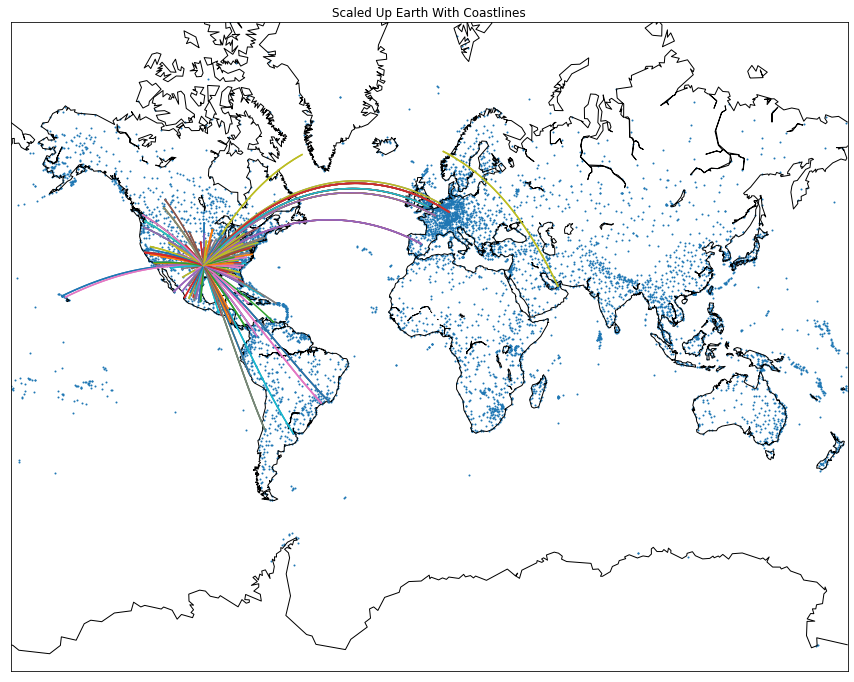

In [10]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")

# generate scatter plot to plot points on map by basemap.scatter() method

# s parameter is the size of each marker
m.scatter(x, y, s=1)

# enable coast lines to be displayed
m.drawcoastlines()

# plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route
# basemap.drawgreatcircle() method can display a great circle between 2 points
# The basemap.drawgreatcircle() method requires four parameters in the following order:
# lon1 - longitude of the starting point
# lat1 - latitude of the starting point
# lon2 - longitude of the ending point
# lat2 - latitude of the ending point

def create_great_circles(df):
    for index, row in df.iterrows():
        
        start_lat = row["start_lat"]
        end_lat = row["end_lat"]
        
        start_lon = row["start_lon"]
        end_lon = row["end_lon"]
        
        # basemap struggles to create great circles for routes that have an absolute difference of larger than 180 degrees for either the latitude or longitude values
        
        if abs(end_lat - start_lat) < 180:
           if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

# create a filtered dataframe containing just the routes that start at the DFW airport
# select only the rows in geo_routes where the value for the source column equals "DFW"
dfw = geo_routes[geo_routes["source"]=="DFW"]

create_great_circles(dfw)


plt.show()